In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
Regions = ["North", "East", "West", "South"]
Product_Category = ["Electronics", "Clothing", "Food"]
data = {
    "Region" : np.random.choice(Regions, 500),
    "Product_Category" : np.random.choice(Product_Category, 500),
    "Sales" : np.random.randint(30, 5000, 500),
    "Month": np.random.randint(1,13, 500)
}
df = pd.DataFrame(data)
df.head()

,Region,Product_Category,Sales,Month
0,East,Food,1203,8
1,North,Electronics,447,7
2,East,Food,3595,11
3,North,Clothing,4696,10
4,West,Food,1842,10


In [6]:
sales_by_region = df.groupby("Region")["Sales"].sum().sort_values(ascending=False)
print(sales_by_region)
print(f"Top selling region: {sales_by_region.idxmax()} with revenue of: {sales_by_region.max()}")

Region
North    347081
East     312678
South    288186
West     274960
Name: Sales, dtype: int32
Top selling region: North with revenue of: 347081


Text(0.5, 1.0, 'Total Sales by Region')

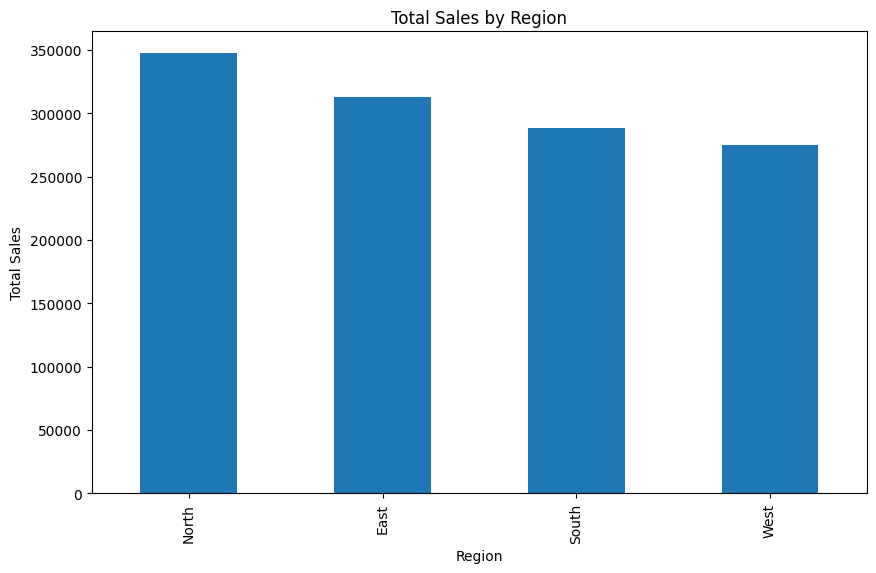

In [22]:
plt.figure(figsize=(10,6))
sales_by_region.plot(kind='bar')
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.title("Total Sales by Region")

In [7]:
sales_by_product = df.groupby("Product_Category")["Sales"].mean()
print(sales_by_product)

Product_Category
Clothing       2354.546012
Electronics    2603.774011
Food           2364.037500
Name: Sales, dtype: float64


In [16]:
for index, value in sales_by_product.items():
    print(f"For product: {index}, revenue generated is: {round(value,2)}")

For product: Clothing, revenue generated is: 2354.55
For product: Electronics, revenue generated is: 2603.77
For product: Food, revenue generated is: 2364.04


In [28]:
total_sales = df["Sales"].sum()
total_by_product = df.groupby("Product_Category")["Sales"].sum()
pct_per_category = round(total_by_product / total_sales * 100,2)
pct_per_category

Product_Category
Clothing       31.38
Electronics    37.69
Food           30.93
Name: Sales, dtype: float64

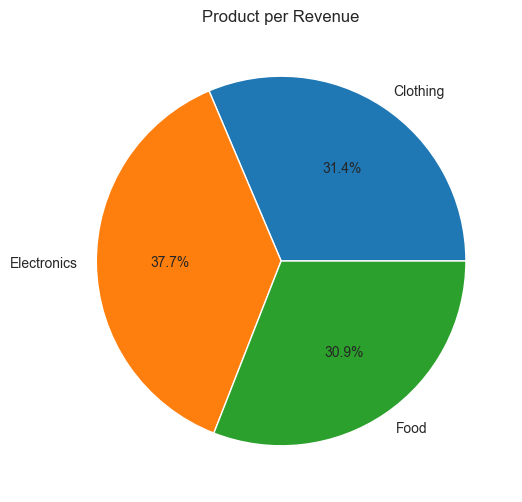

In [35]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(pct_per_category, labels=["Clothing", "Electronics", "Food"], autopct='%1.1f%%')
plt.title('Product per Revenue')
plt.show()

In [39]:
sales_by_month = df.groupby("Month")["Sales"].sum()


Month
1     115525
2     108051
3      98731
4     115059
5      98761
6      76492
7      91352
8     103502
9     120566
10    112937
11     94603
12     86004
Name: Sales, dtype: int32

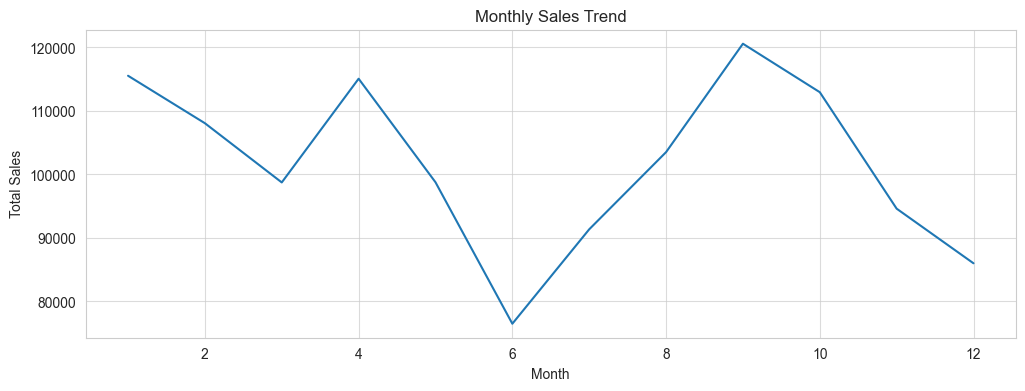

In [45]:
plt.figure(figsize=(12,4))
sales_by_month.plot()
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")
plt.grid(alpha=0.7)